In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
syn_type = 'apical_proximal'
num_syns = 50
syn_weight = 1
in_freq = 40

sim_name = f'EXC-{syn_type}'
sim_label = f'{sim_name}_{num_syns}Ex{syn_weight}_{in_freq}Hz'
sim_label += '_new-tau'

sim_dir = f'/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/{sim_name}/{sim_label}'

In [3]:
with open(os.path.join(sim_dir, f'L5PC_{sim_label}_data.pkl'),'rb') as fp:
    all_data = pickle.load(fp)
simData = all_data['simData']
# stims = all_data['stims']

--No graphics will be displayed.


In [4]:
all_data.keys()

dict_keys(['netpyne_version', 'netpyne_changeset', 'net', 'simConfig', 'simData'])

In [10]:
all_data['net'].keys()

dict_keys(['params', 'cells', 'pops'])

In [8]:
all_data['net']['cells'][:5]

[{gid: 0, tags: {cellType: 'PYR', cellModel: 'Hay2011', pop: 'L5PC_Pop', xnorm: 0.3583531143706401, ynorm: 0.3984944342173416, znorm: 0.8763654583887277, x: 35.83531143706401, y: 39.84944342173416, z: 87.63654583887276, label: ['L5PC_hoc']}, conns: [{preGid: 1, sec: 'apic_20', loc: 0.2, synMech: 'AMPA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 1, sec: 'apic_20', loc: 0.7, synMech: 'NMDA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 2, sec: 'apic_92', loc: 0.2, synMech: 'AMPA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 2, sec: 'apic_92', loc: 0.7, synMech: 'NMDA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 3, sec: 'apic_86', loc: 0.2, synMech: 'AMPA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 3, sec: 'apic_86', loc: 0.7, synMech: 'NMDA', weight: 1, delay: 5, label: 'vecstim_E0->L5PC_Pop', preLoc: 0.5}, {preGid: 4, sec: 'apic_3

In [6]:
t = np.array(simData['t'])
V_soma = np.array(simData['V_soma']['cell_0'])
t_spikes = t[np.where(V_soma>-10)]

In [7]:
%matplotlib inline

In [8]:
sec_traces = list(simData.keys())
[sec_traces.remove(key) for key in ['spkt', 'spkid', 't', 'V_soma', 'avgRate', '__dict__'] if key in sec_traces]
num_secs = len(sec_traces)//3

In [9]:
simData.keys()

dict_keys(['spkt', 'spkid', 'V_soma', 'V_apic_83', 'I_apic_83_ampa', 'I_apic_83_nmda', 'V_apic_78', 'I_apic_78_ampa', 'I_apic_78_nmda', 'V_apic_103', 'I_apic_103_ampa', 'I_apic_103_nmda', 'V_apic_68', 'I_apic_68_ampa', 'I_apic_68_nmda', 'V_apic_23', 'I_apic_23_ampa', 'I_apic_23_nmda', 'V_apic_105', 'I_apic_105_ampa', 'I_apic_105_nmda', 'V_apic_90', 'I_apic_90_ampa', 'I_apic_90_nmda', 'V_apic_72', 'I_apic_72_ampa', 'I_apic_72_nmda', 'V_apic_85', 'I_apic_85_ampa', 'I_apic_85_nmda', 'V_apic_80', 'I_apic_80_ampa', 'I_apic_80_nmda', 'V_apic_20', 'I_apic_20_ampa', 'I_apic_20_nmda', 'V_apic_96', 'I_apic_96_ampa', 'I_apic_96_nmda', 'V_apic_21', 'I_apic_21_ampa', 'I_apic_21_nmda', 'V_apic_61', 'I_apic_61_ampa', 'I_apic_61_nmda', 'V_apic_70', 'I_apic_70_ampa', 'I_apic_70_nmda', 'V_apic_64', 'I_apic_64_ampa', 'I_apic_64_nmda', 'V_apic_18', 'I_apic_18_ampa', 'I_apic_18_nmda', 'V_apic_27', 'I_apic_27_ampa', 'I_apic_27_nmda', 'V_apic_56', 'I_apic_56_ampa', 'I_apic_56_nmda', 'V_apic_26', 'I_apic_26_a

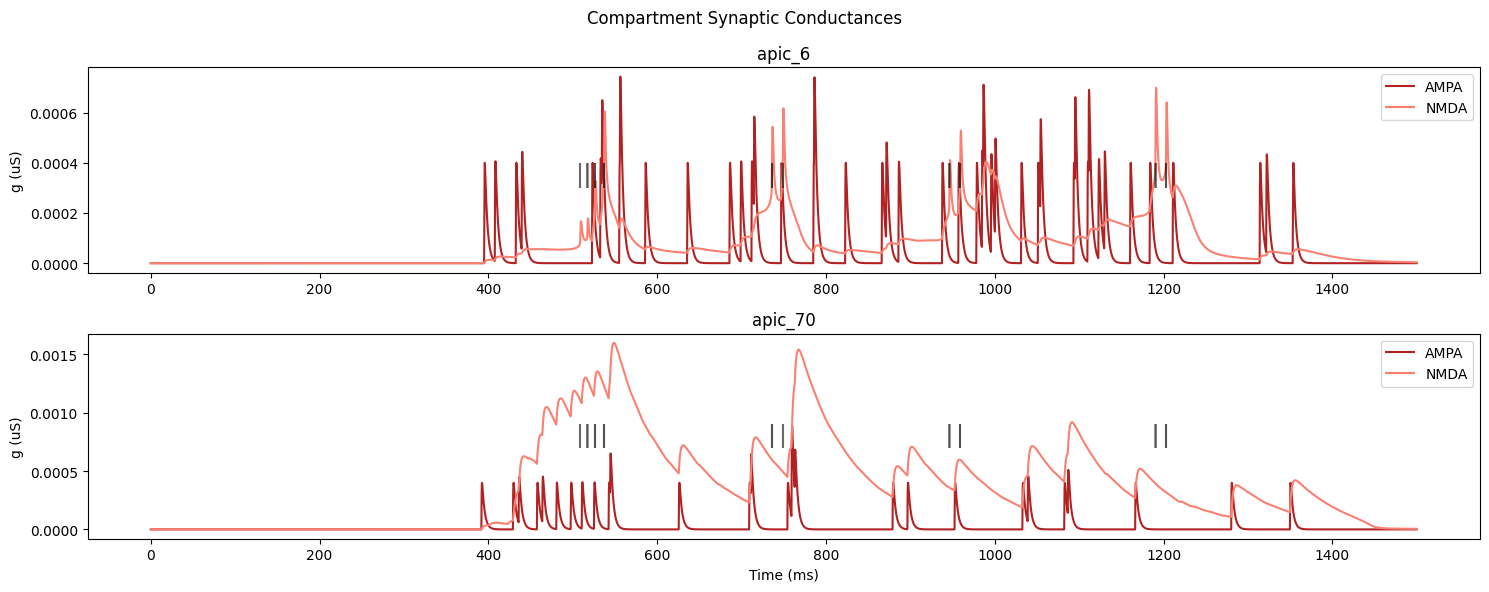

In [63]:
sections = ['apic_6', 'apic_70']
colors = ['firebrick', 'salmon']
diff = [0.00005, 0.0001]

fig, axs = plt.subplots(len(sections), 1, figsize=(15,6))
axs.ravel()

# axs[0].plot(t, V_soma, label=f'soma')

for i, section in enumerate(sections):
    I_ampa = list(simData[f'I_{section}_ampa']['cell_0'])
    I_nmda = list(simData[f'I_{section}_nmda']['cell_0'])
    axs[i].plot(t, I_ampa, label=f'AMPA', color=colors[0])
    axs[i].vlines(t_spikes, [(max(I_nmda)/2)-diff[i]], [(max(I_nmda)/2)+diff[i]], 'k', alpha=0.2, zorder=12)

    axs[i].plot(t, I_nmda, label=f'NMDA', color=colors[1])
    # axs[i].vlines(t_spikes, [(max(I_ampa)/2)-0.00005], [(max(I_ampa)/2)+0.00005], 'k', alpha=0.2, zorder=12)
    axs[i].set_title(f'{section}')
    axs[i].set_ylabel('g (uS)')
    axs[i].legend(loc='upper right')
    # axs[i].set_ylim([-80,30])

axs[-1].set_xlabel('Time (ms)');

fig.suptitle('Compartment Synaptic Conductances')
fig.tight_layout()
fig.savefig(os.path.join(sim_dir, 'compartment_syn-con.png'),dpi=300)

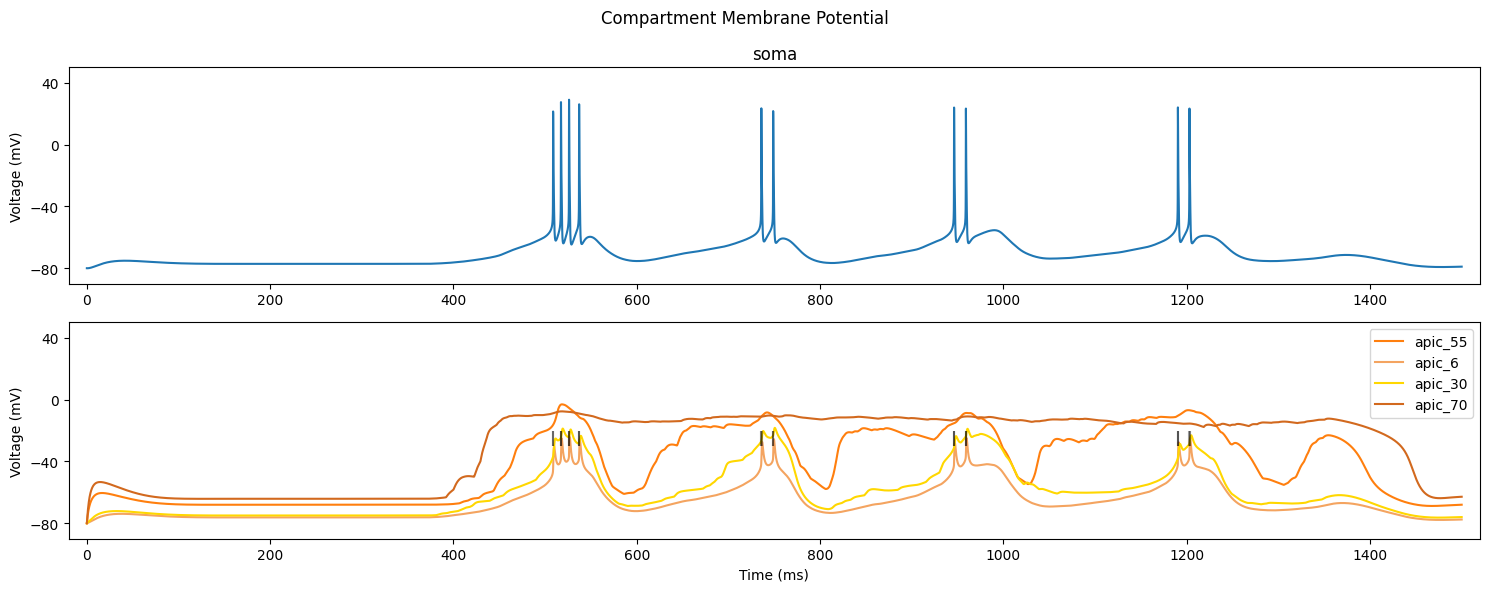

In [46]:
sections = ['apic_55', 'apic_6', 'apic_30', 'apic_70']
colors = ['tab:blue', 'tab:orange', 'sandybrown', 'gold', 'chocolate']

fig, axs = plt.subplots(2, 1, figsize=(15,6))
axs.ravel()

axs[0].plot(t, V_soma, label=f'soma', color=colors[0])
axs[0].set_title('soma')

for i, section in enumerate(sections):
    axs[1].plot(t, list(simData[f'V_{section}']['cell_0']), label=f'{section}', color=colors[i+1], zorder=1)

axs[1].legend(loc='upper right')

axs[1].vlines(t_spikes, -30, -20, 'k', alpha=0.2, zorder=12)
axs[1].set_xlabel('Time (ms)');

for ax in axs:
    ax.set_ylim([-90,50])
    ax.set_yticks([-80, -40, 0, 40,])
    ax.set_xlim([-20,1520])
    ax.set_ylabel('Voltage (mV)')

fig.suptitle('Compartment Membrane Potential')
fig.tight_layout()
fig.savefig(os.path.join(sim_dir,'compartment_mem-pot.png'),dpi=300)

### Compartment membrane potential and synaptic conductances

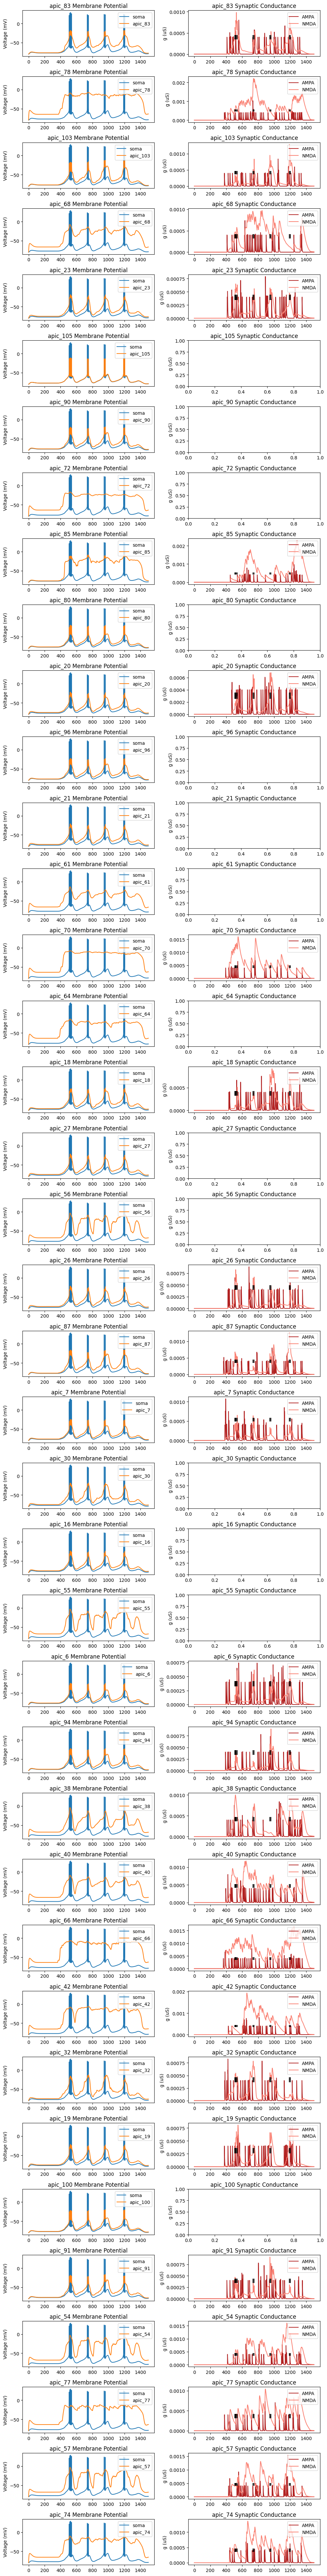

In [17]:
fig, axs = plt.subplots(num_secs, 2, figsize=(10,num_secs*2))
axs.ravel()

for i in range(num_secs):

    sec_i = 3*i

    if num_secs > 1:
        idx_0 = (i, 0)
        idx_1 = (i, 1)
    else:
        plt_i = 2*i
        idx_0 = (plt_i)
        idx_1 = (plt_i+1)
    
    sec = sec_traces[sec_i].split('V_')[1]

    axs[idx_0].plot(t, V_soma, label='soma')
    axs[idx_0].plot(t, list(simData[sec_traces[sec_i]]['cell_0']), label=f'{sec}')
    axs[idx_0].set_title(f'{sec} Membrane Potential')
    axs[idx_0].set_ylabel('Voltage (mV)')
    axs[idx_0].legend(loc='upper right')

    I_ampa = list(simData[sec_traces[sec_i+1]]['cell_0'])
    I_nmda = list(simData[sec_traces[sec_i+2]]['cell_0'])
    if len(I_ampa) > 0:
        axs[idx_1].plot(t, I_ampa, label='AMPA', zorder=1, color='firebrick')
        axs[idx_1].vlines(t_spikes, [(max(I_ampa)/2)-0.00005], [(max(I_ampa)/2)+0.00005], 'k', zorder=12)
    if len(I_nmda):
        axs[idx_1].plot(t, I_nmda, label='NMDA', zorder=2, color='salmon')
        axs[idx_1].legend(loc='upper right')
    axs[idx_1].set_title(f'{sec} Synaptic Conductance')
    axs[idx_1].set_ylabel('g (uS)')

fig.tight_layout()


### Somatic synaptic conductances

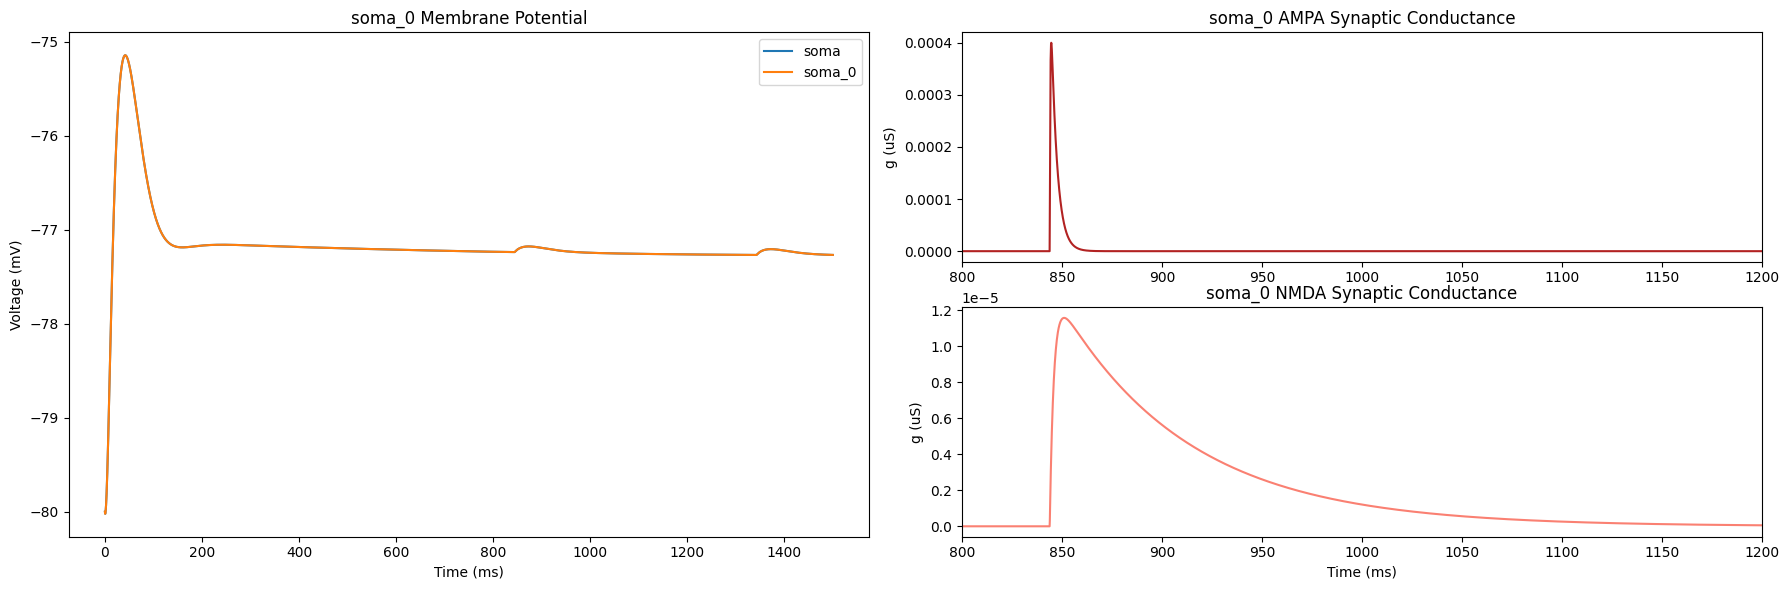

In [20]:
fig = plt.figure(figsize=(18,6))
outer_grid = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(outer_grid[0,0])
inner_grid = outer_grid[0,1].subgridspec(ncols=1, nrows=2)
(ax2a, ax2b) = inner_grid.subplots()

sec = 'soma_0'

ax1.plot(t, simData[f'V_soma']['cell_0'], label='soma')
ax1.plot(t, simData[f'V_{sec}']['cell_0'], label=f'{sec}')
ax1.set_title(f'{sec} Membrane Potential')
ax1.set_ylabel('Voltage (mV)')
ax1.set_xlabel('Time (ms)')
ax1.legend(loc='upper right')

ax2a.plot(t, simData[f'I_{sec}_ampa']['cell_0'], label='AMPA', color='firebrick')
ax2b.plot(t, simData[f'I_{sec}_nmda']['cell_0'], label='NMDA', color='salmon')
ax2a.set_title(f'{sec} AMPA Synaptic Conductance')
ax2b.set_title(f'{sec} NMDA Synaptic Conductance')
ax2a.set_xlim([800,1200])
ax2b.set_xlim([800,1200])
ax2a.set_ylabel('g (uS)')
ax2b.set_ylabel('g (uS)')
ax2b.set_xlabel('Time (ms)')
# ax2.legend(loc='upper right')

fig.tight_layout()
fig.savefig(os.path.join(sim_dir, 'synaptic_conductances.png'),dpi=300)

plt.show()

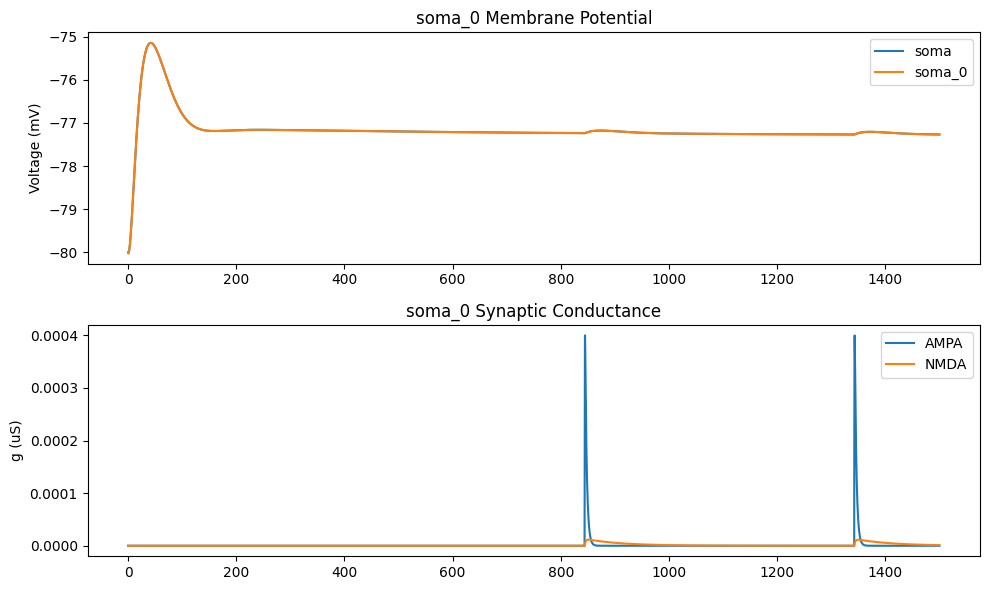

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(10,6))
axs.ravel()

sec = 'soma_0'

axs[0].plot(t, simData[f'V_soma']['cell_0'], label='soma')
axs[0].plot(t, simData[f'V_{sec}']['cell_0'], label=f'{sec}')
axs[0].set_title(f'{sec} Membrane Potential')
axs[0].set_ylabel('Voltage (mV)')
axs[0].legend(loc='upper right')

axs[1].plot(t, simData[f'I_{sec}_ampa']['cell_0'], label='AMPA')
axs[1].plot(t, simData[f'I_{sec}_nmda']['cell_0'], label='NMDA')
axs[1].set_title(f'{sec} Synaptic Conductance')
axs[1].set_ylabel('g (uS)')
axs[1].legend(loc='upper right')

fig.tight_layout()
fig.show()

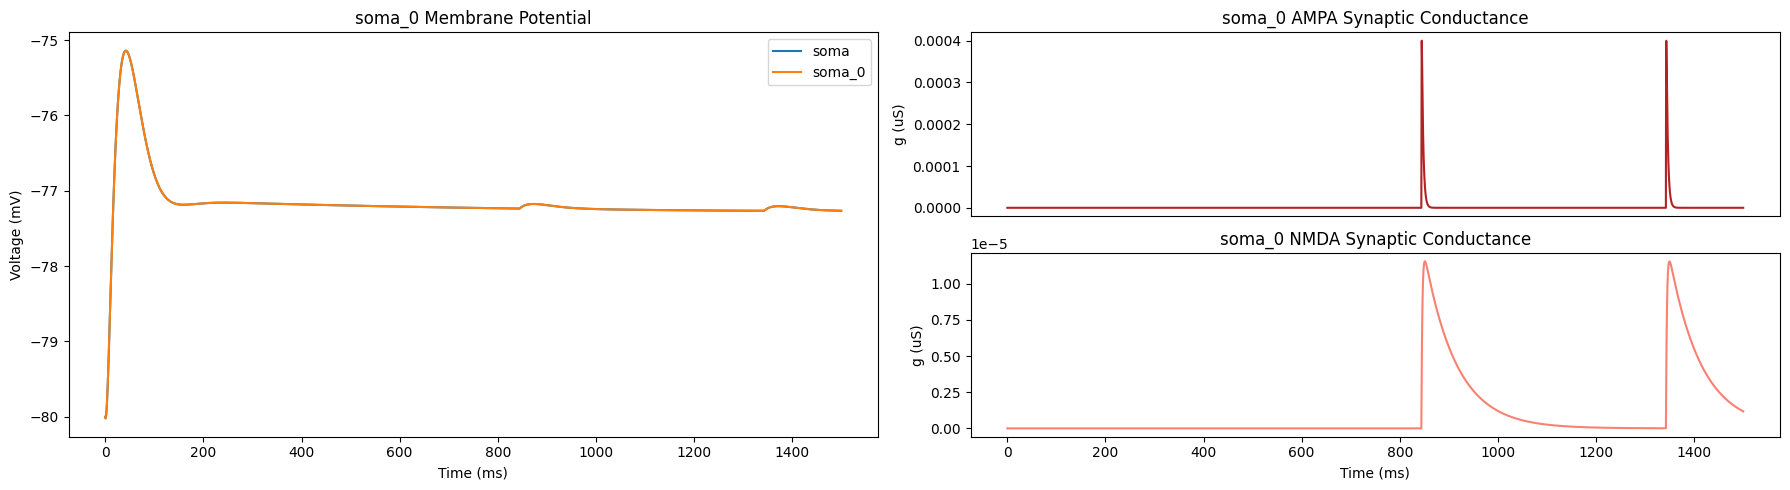

In [22]:
# fig, axs = plt.subplots(num_secs, 2, figsize=(10,num_secs*2))

fig = plt.figure(figsize=(18,num_secs*5))
outer_grid = fig.add_gridspec(num_secs,2)
# sec = 'soma_0'

for i in range(num_secs):

    axL = fig.add_subplot(outer_grid[i,0])
    inner_grid = outer_grid[i,1].subgridspec(nrows=2, ncols=1)
    (axRa, axRb) = inner_grid.subplots()

    sec_i = 3*i

    if num_secs > 1:
        idx_0 = (i, 0)
        idx_1 = (i, 1)
    else:
        plt_i = 2*i
        idx_0 = (plt_i)
        idx_1 = (plt_i+1)
    
    sec = sec_traces[sec_i].split('V_')[1]

    axL.plot(t, simData[f'V_soma']['cell_0'], label='soma')
    axL.plot(t, simData[f'V_{sec}']['cell_0'], label=f'{sec}')
    axL.set_title(f'{sec} Membrane Potential')
    axL.set_ylabel('Voltage (mV)')
    axL.set_xlabel('Time (ms)')
    axL.legend(loc='upper right')

    I_ampa = list(simData[f'I_{sec}_ampa']['cell_0'])
    I_nmda = list(simData[f'I_{sec}_nmda']['cell_0'])
    
    if len(I_ampa) > 100:
        axRa.plot(t, simData[f'I_{sec}_ampa']['cell_0'], label='AMPA', color='firebrick')
        axRa.set_title(f'{sec} AMPA Synaptic Conductance')
        # axRa.set_xlim([800,1200])
        axRa.set_xticks([])
        axRa.set_ylabel('g (uS)')

    if len(I_nmda) > 100:
        axRb.plot(t, simData[f'I_{sec}_nmda']['cell_0'], label='NMDA', color='salmon')
        axRb.set_title(f'{sec} NMDA Synaptic Conductance')
        # axRb.set_xlim([800,1200])
        axRb.set_ylabel('g (uS)')
        axRb.set_xlabel('Time (ms)')
# ax2.legend(loc='upper right')

fig.tight_layout()


In [23]:
len(list(simData[f'I_apic_103_ampa']['cell_0']))

0